In [239]:
# prompt: import the necessary libraries  for data anaysis

# Common libraries
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Statistical analysis
from scipy import stats

# Machine learning
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [240]:
data=pd.read_csv("F:\datasets\indianEco.csv")
data

,Year,Country Name,GDP (current US$),GDP per capita (current US$),GDP growth (annual %),Imports of goods and services (% of GDP),Exports of goods and services (% of GDP),"Total reserves (includes gold, current US$)","Inflation, consumer prices (annual %)","Population, total",Population growth (annual %),"Life expectancy at birth, total (years)"
0,1960,India,3.702988e+10,82,0.00,6.83,4.46,6.745366e+08,1.78,445954579,2.31,41.13
1,1961,India,3.923244e+10,85,3.72,5.96,4.30,6.663571e+08,1.70,456351876,2.33,41.74
2,1962,India,4.216148e+10,90,2.93,6.03,4.17,5.127918e+08,3.63,467024193,2.34,42.34
3,1963,India,4.842192e+10,101,5.99,5.91,4.28,6.078625e+08,2.95,477933619,2.34,42.94
4,1964,India,5.648029e+10,116,7.45,5.69,3.73,4.991451e+08,13.36,489059309,2.33,43.57
...,...,...,...,...,...,...,...,...,...,...,...,...
56,2016,India,2.294798e+12,1733,8.26,20.92,19.16,3.616943e+11,4.95,1338636340,1.19,68.67
57,2017,India,2.651473e+12,1981,6.80,21.95,18.79,4.126138e+11,3.33,1354195680,1.16,68.97
58,2018,India,2.702930e+12,1997,6.53,23.69,19.93,3.991672e+11,3.94,1369003306,1.09,69.27
59,2019,India,2.831552e+12,2101,4.04,21.27,18.69,4.634699e+11,3.73,1383112050,1.03,69.50


In [241]:
data.isnull().sum()

Year                                             0
Country Name                                     0
GDP (current US$)                                0
 GDP per capita (current US$)                    0
GDP growth (annual %)                            0
Imports of goods and services (% of GDP)         0
Exports of goods and services (% of GDP)         0
 Total reserves (includes gold, current US$)     0
Inflation, consumer prices (annual %)            0
Population, total                                0
Population growth (annual %)                     0
Life expectancy at birth, total (years)          0
dtype: int64

In [242]:
data.dtypes

Year                                               int64
Country Name                                      object
GDP (current US$)                                float64
 GDP per capita (current US$)                      int64
GDP growth (annual %)                            float64
Imports of goods and services (% of GDP)         float64
Exports of goods and services (% of GDP)         float64
 Total reserves (includes gold, current US$)     float64
Inflation, consumer prices (annual %)            float64
Population, total                                  int64
Population growth (annual %)                     float64
Life expectancy at birth, total (years)          float64
dtype: object

In [243]:
data.describe()

,Year,GDP (current US$),GDP per capita (current US$),GDP growth (annual %),Imports of goods and services (% of GDP),Exports of goods and services (% of GDP),"Total reserves (includes gold, current US$)","Inflation, consumer prices (annual %)","Population, total",Population growth (annual %),"Life expectancy at birth, total (years)"
count,61.000000,6.100000e+01,61.000000,61.000000,61.000000,61.000000,6.100000e+01,61.000000,6.100000e+01,61.000000,61.000000
mean,1990.000000,6.584725e+11,575.557377,4.938197,12.746393,10.885574,9.802227e+10,7.413279,8.913946e+08,1.927705,57.146230
std,17.752934,8.129606e+11,584.079062,3.344891,8.155110,7.060458,1.497102e+11,4.940153,2.974496e+08,0.419024,8.459559
min,1960.000000,3.702988e+10,82.000000,-7.250000,3.710000,3.310000,4.991451e+08,-7.630000,4.459546e+08,0.960000,41.130000
25%,1975.000000,9.952590e+10,161.000000,3.720000,6.590000,5.200000,2.324650e+09,4.010000,6.235242e+08,1.620000,50.630000
50%,1990.000000,2.882084e+11,340.000000,5.530000,8.570000,7.050000,1.151174e+10,6.670000,8.704522e+08,2.150000,57.660000
75%,2005.000000,8.203816e+11,715.000000,7.450000,19.640000,18.690000,1.378248e+11,10.020000,1.154639e+09,2.260000,64.310000
max,2020.000000,2.831552e+12,2101.000000,9.630000,31.260000,25.430000,5.902274e+11,28.600000,1.396387e+09,2.340000,69.730000


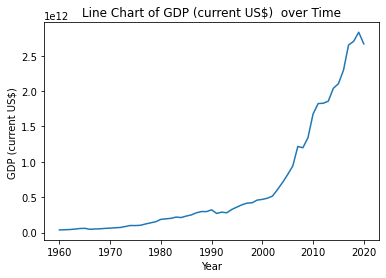

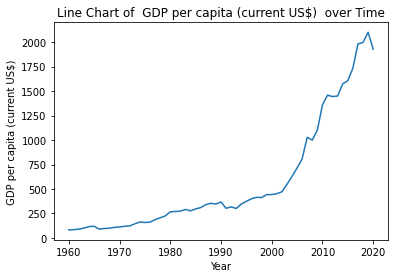

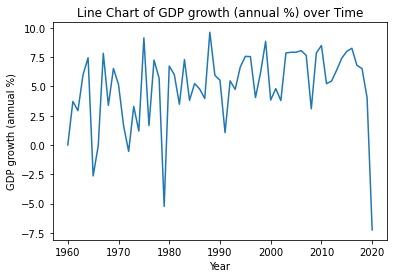

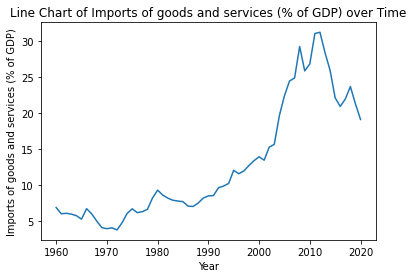

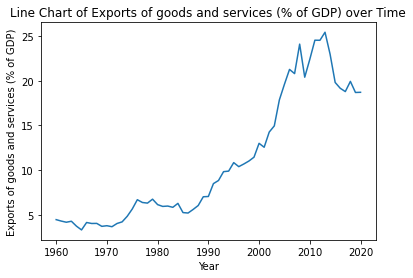

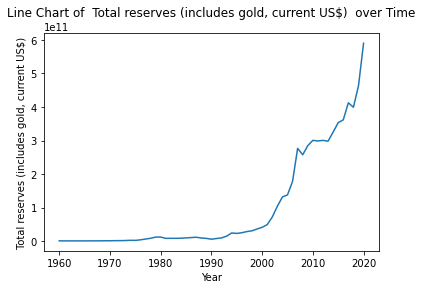

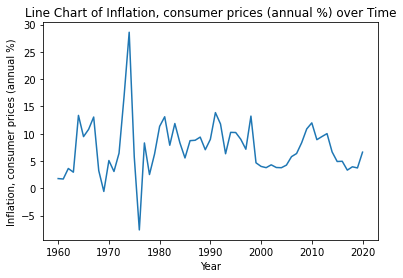

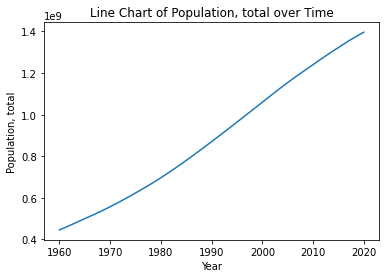

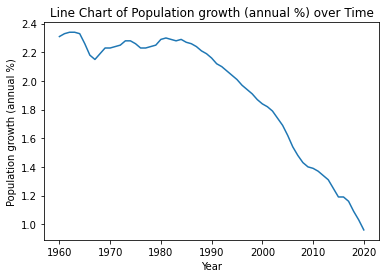

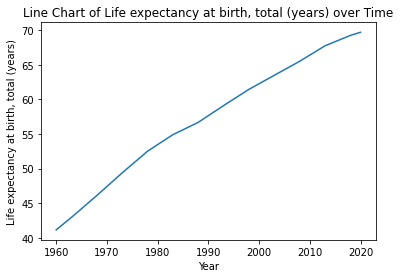

In [244]:
# prompt: plot the line chat of every column of the data with time except the column year

import matplotlib.pyplot as plt
for col in data.columns:
  if col not in ('Year', 'Country Name'):
    plt.plot(data['Year'], data[col])
    plt.xlabel('Year')
    plt.ylabel(col)
    plt.title(f'Line Chart of {col} over Time')
    plt.show()


In [245]:

data = data.drop('Country Name', axis=1)


In [246]:
data.corr()

,Year,GDP (current US$),GDP per capita (current US$),GDP growth (annual %),Imports of goods and services (% of GDP),Exports of goods and services (% of GDP),"Total reserves (includes gold, current US$)","Inflation, consumer prices (annual %)","Population, total",Population growth (annual %),"Life expectancy at birth, total (years)"
Year,1.000000,0.846589,0.865053,0.278268,0.873956,0.909573,0.814619,-0.037177,0.997523,-0.907750,0.995487
GDP (current US$),0.846589,1.000000,0.998605,0.119174,0.835933,0.847781,0.980297,-0.105585,0.863530,-0.957492,0.803927
GDP per capita (current US$),0.865053,0.998605,1.000000,0.142764,0.853837,0.863811,0.977189,-0.091981,0.880301,-0.959680,0.825702
GDP growth (annual %),0.278268,0.119174,0.142764,1.000000,0.280289,0.269356,0.049946,0.007843,0.276103,-0.168449,0.294472
Imports of goods and services (% of GDP),0.873956,0.835933,0.853837,0.280289,1.000000,0.989499,0.841084,-0.034099,0.894541,-0.912249,0.849597
Exports of goods and services (% of GDP),0.909573,0.847781,0.863811,0.269356,0.989499,1.000000,0.851635,-0.073604,0.927934,-0.935063,0.886921
"Total reserves (includes gold, current US$)",0.814619,0.980297,0.977189,0.049946,0.841084,0.851635,1.000000,-0.107925,0.835249,-0.957013,0.767909
"Inflation, consumer prices (annual %)",-0.037177,-0.105585,-0.091981,0.007843,-0.034099,-0.073604,-0.107925,1.000000,-0.053939,0.123497,-0.014927
"Population, total",0.997523,0.863530,0.880301,0.276103,0.894541,0.927934,0.835249,-0.053939,1.000000,-0.928431,0.987134
Population growth (annual %),-0.907750,-0.957492,-0.959680,-0.168449,-0.912249,-0.935063,-0.957013,0.123497,-0.928431,1.000000,-0.868766


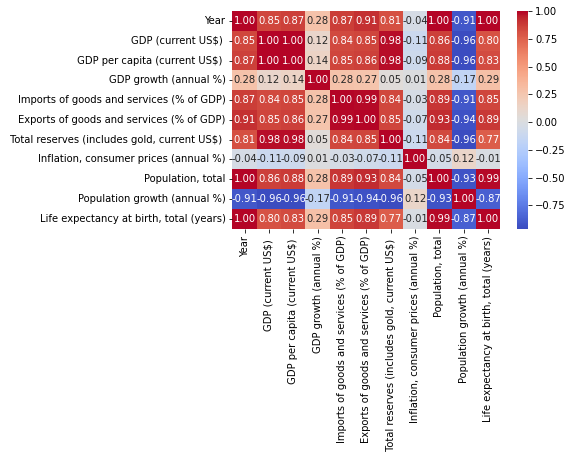

<Figure size 1440x1440 with 0 Axes>

In [247]:
import seaborn as sns

# Create the heatmap
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f",
            xticklabels=data.columns, yticklabels=data.columns)

# Set large figure size
plt.figure(figsize=(20, 20))

# Show the heatmap
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6448\4234885766.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


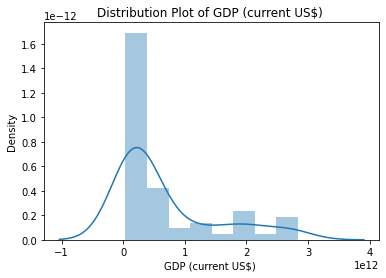

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6448\4234885766.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


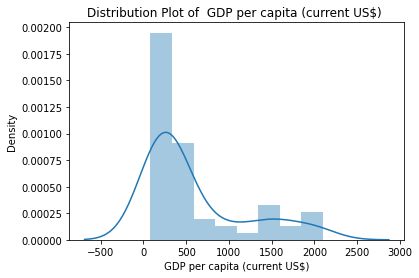

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6448\4234885766.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


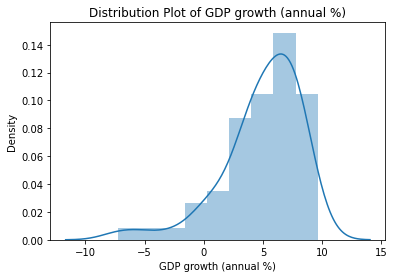

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6448\4234885766.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


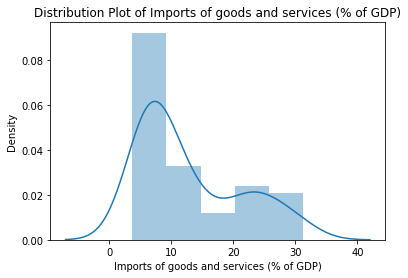

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6448\4234885766.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


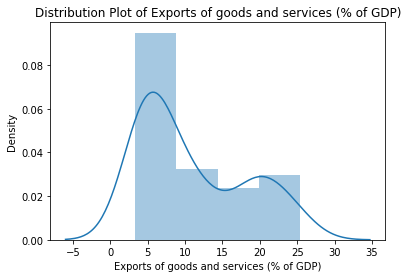

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6448\4234885766.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


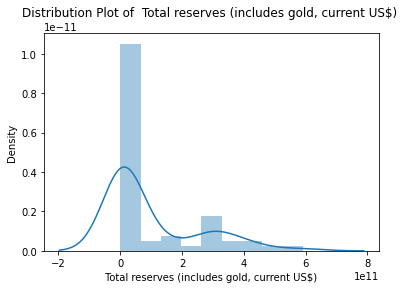

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6448\4234885766.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


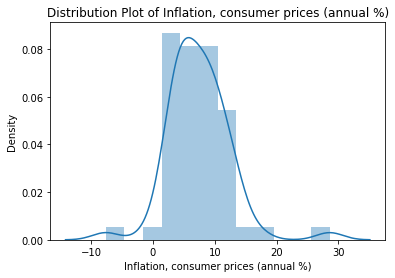

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6448\4234885766.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


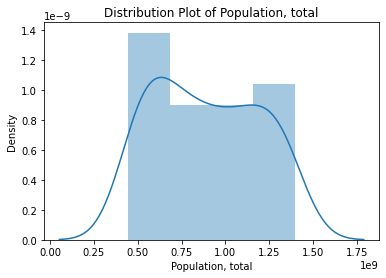

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6448\4234885766.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


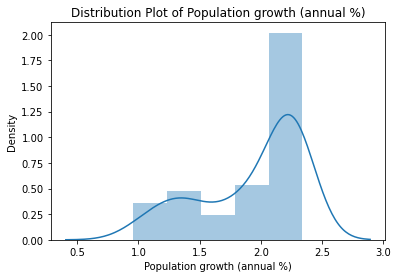

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6448\4234885766.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


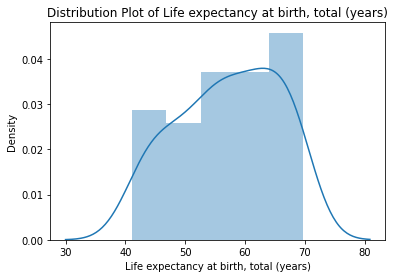

In [248]:

# Iterate through each column except 'Year'
for col in data.columns:
  if col not in ('Year'):
    plt.figure()
    sns.distplot(data[col])
    plt.title(f'Distribution Plot of {col}')
    plt.show()


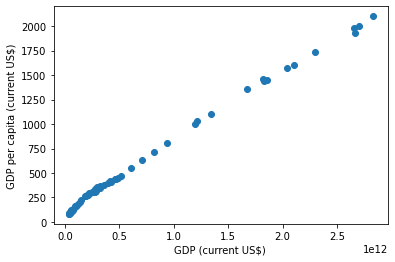

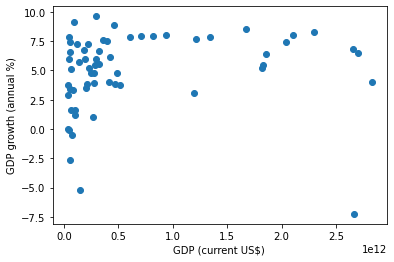

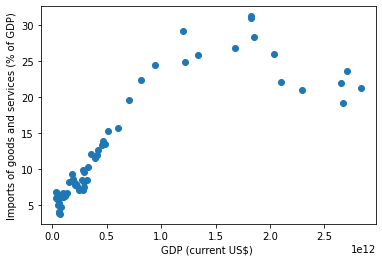

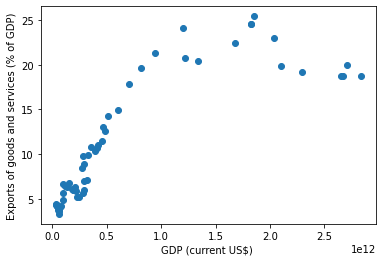

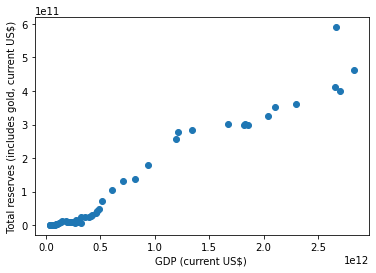

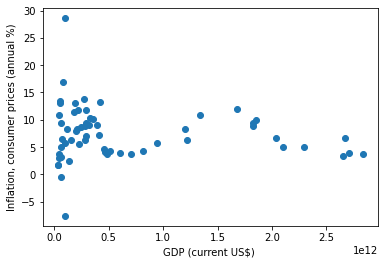

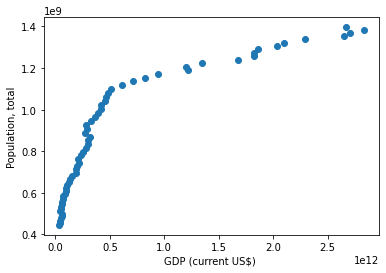

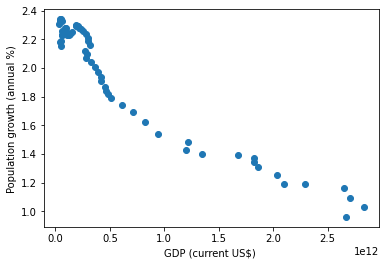

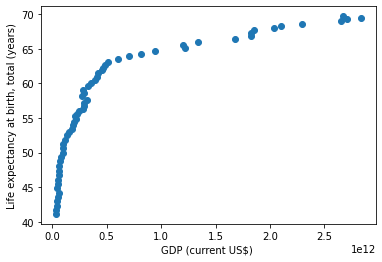

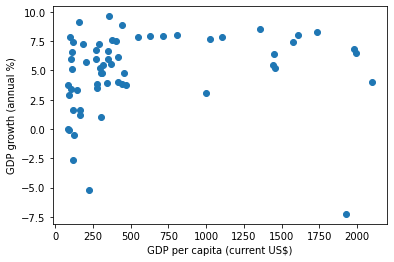

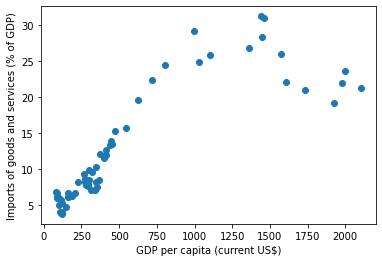

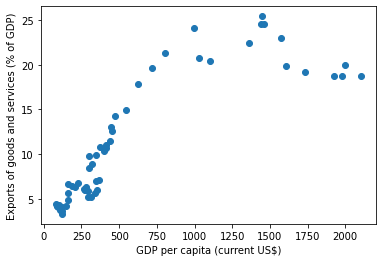

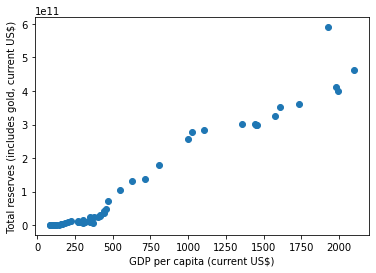

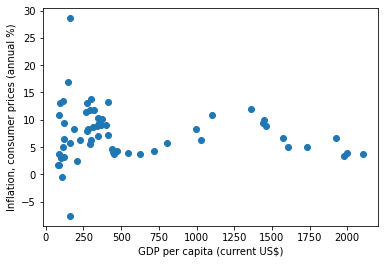

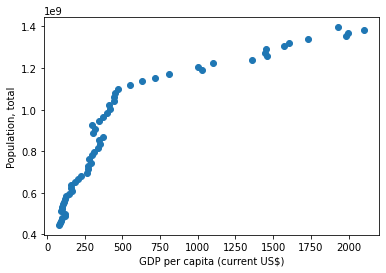

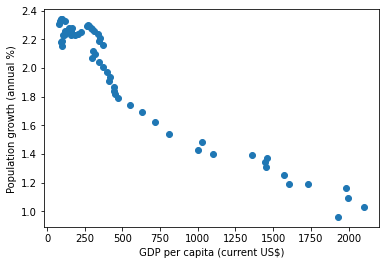

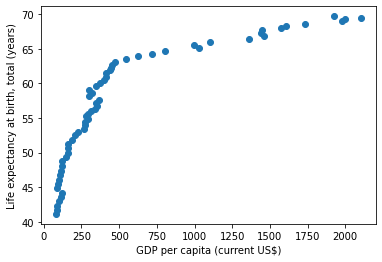

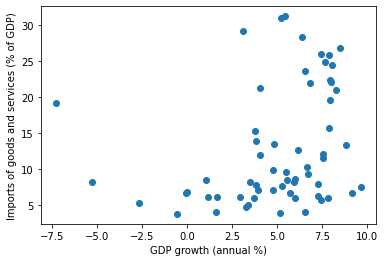

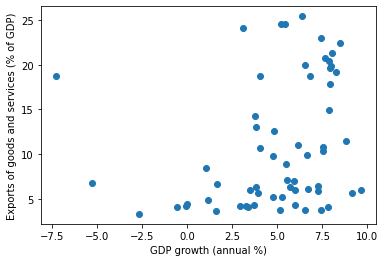

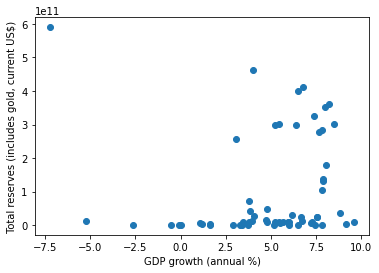

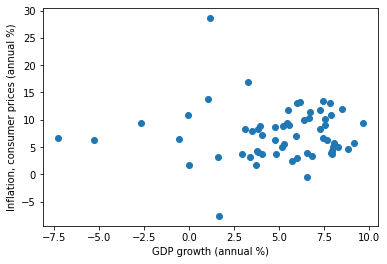

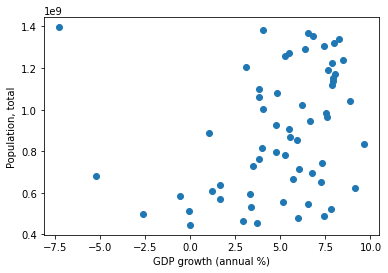

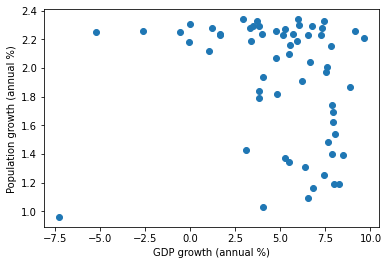

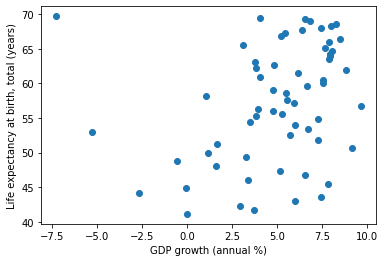

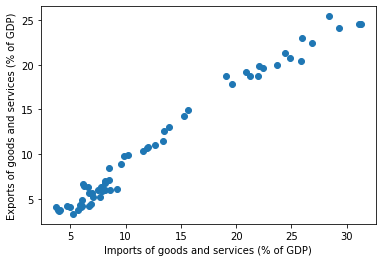

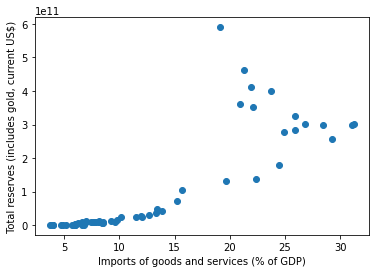

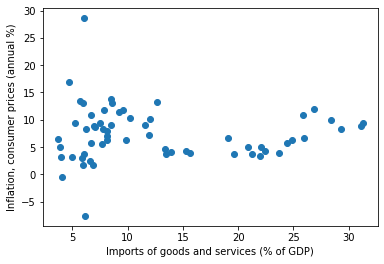

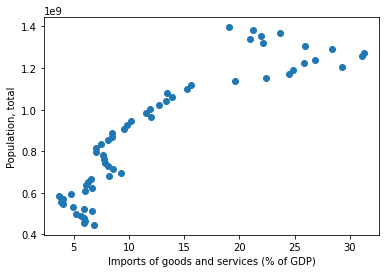

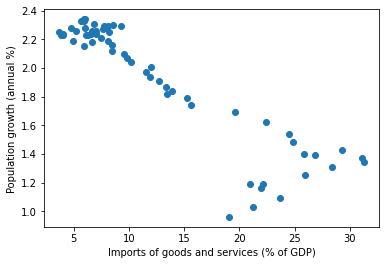

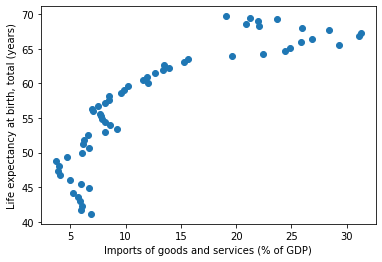

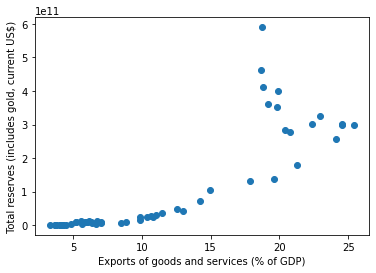

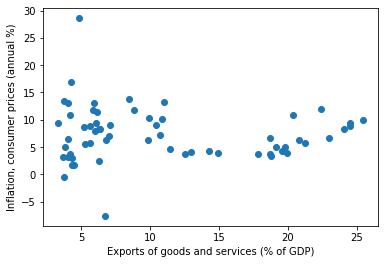

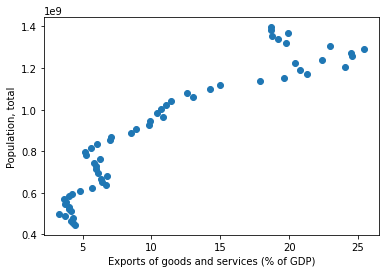

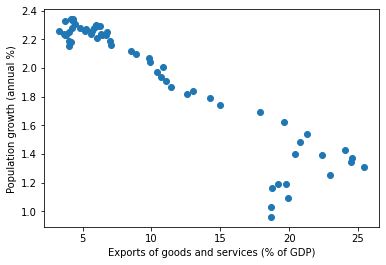

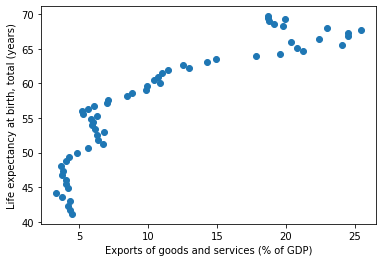

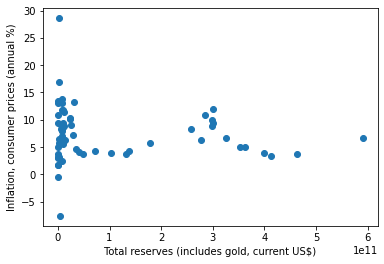

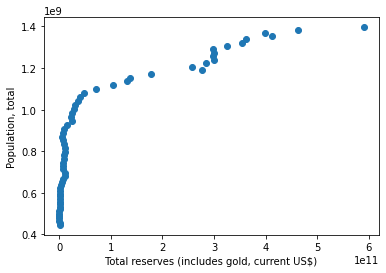

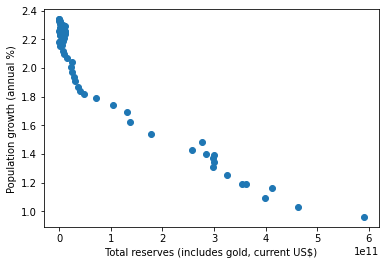

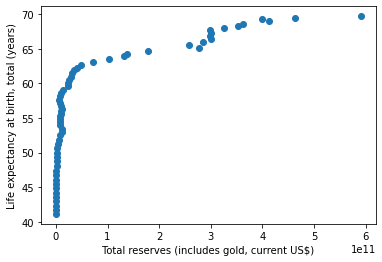

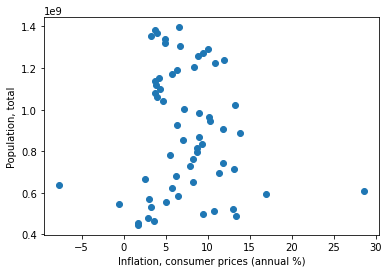

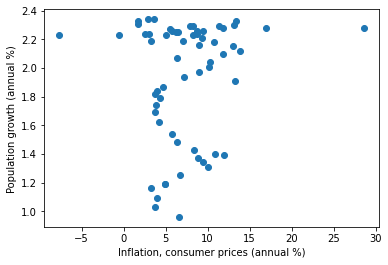

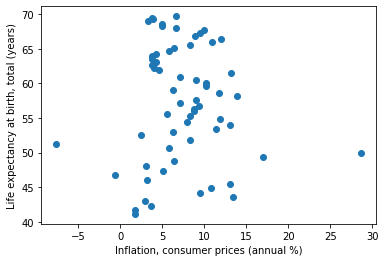

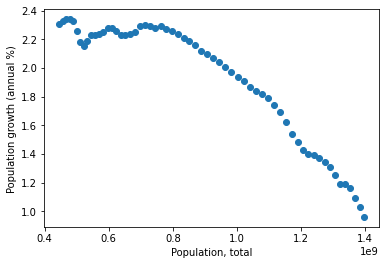

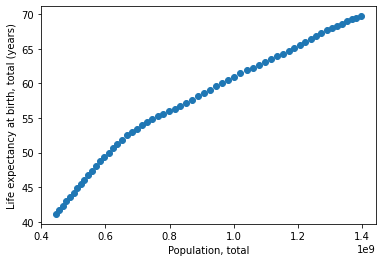

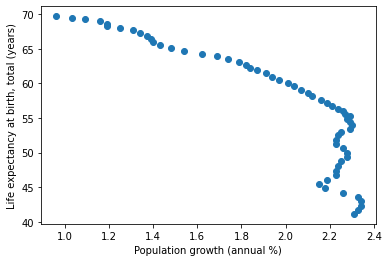

In [249]:
# prompt: make scatter plot with each columns without using pairplot

import matplotlib.pyplot as plt
for i in range(1, len(data.columns)):
  for j in range(i + 1, len(data.columns)):
    plt.scatter(data.iloc[:, i], data.iloc[:, j])
    plt.xlabel(data.columns[i])
    plt.ylabel(data.columns[j])
    plt.show()


In [250]:
data.columns

Index(['Year', 'GDP (current US$) ', ' GDP per capita (current US$) ',
       'GDP growth (annual %)', 'Imports of goods and services (% of GDP)',
       'Exports of goods and services (% of GDP)',
       ' Total reserves (includes gold, current US$) ',
       'Inflation, consumer prices (annual %)', 'Population, total',
       'Population growth (annual %)',
       'Life expectancy at birth, total (years)'],
      dtype='object')

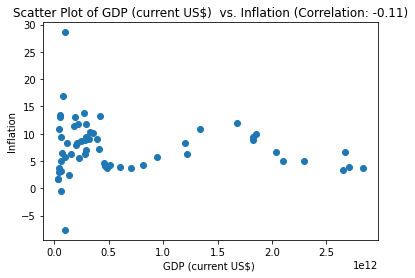

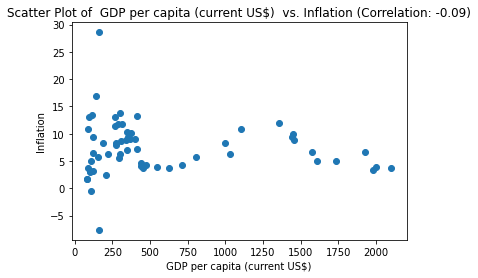

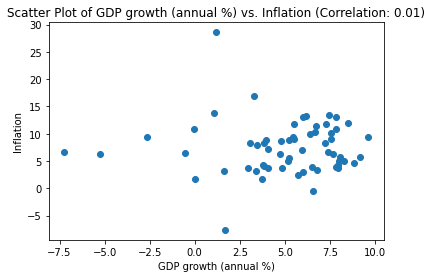

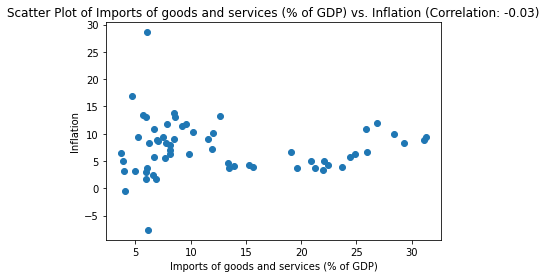

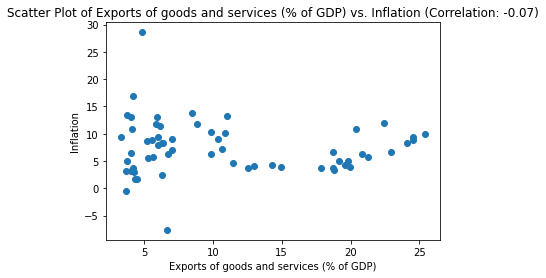

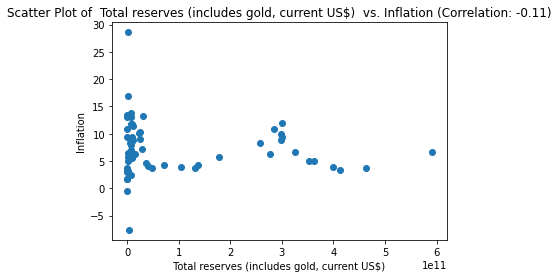

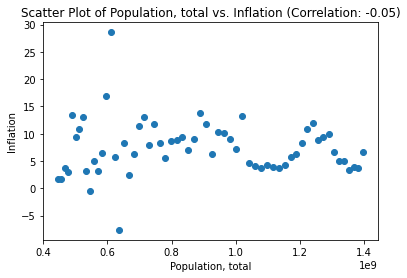

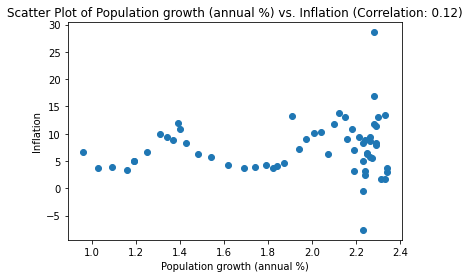

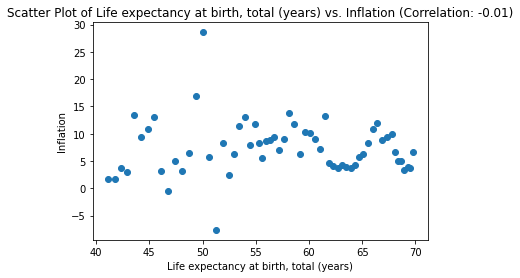

In [251]:

for col in data.columns:
    if col not in ("Year", "Inflation, consumer prices (annual %)"):
        # Create a scatter plot of the current column against the "Inflation" column
        plt.scatter(data[col], data["Inflation, consumer prices (annual %)"])
        plt.xlabel(col)
        plt.ylabel("Inflation")

        # Calculate the correlation between the current column and the "Inflation" column
        correlation = np.corrcoef(data[col], data["Inflation, consumer prices (annual %)"])[0, 1]

        # Display the correlation coefficient in the plot title
        plt.title(f"Scatter Plot of {col} vs. Inflation (Correlation: {correlation:.2f})")
        plt.show()


In [252]:
# prompt: now remove all columns and take only two colums, year and inflation

data_inflation = data[['Year', 'Inflation, consumer prices (annual %)']]
data_inflation


,Year,"Inflation, consumer prices (annual %)"
0,1960,1.78
1,1961,1.70
2,1962,3.63
3,1963,2.95
4,1964,13.36
...,...,...
56,2016,4.95
57,2017,3.33
58,2018,3.94
59,2019,3.73


In [253]:
# prompt: rename the inflation column with only "inflstipn"

data_inflation = data_inflation.rename(columns={'Inflation, consumer prices (annual %)': 'inflation'})
data_inflation


,Year,inflation
0,1960,1.78
1,1961,1.70
2,1962,3.63
3,1963,2.95
4,1964,13.36
...,...,...
56,2016,4.95
57,2017,3.33
58,2018,3.94
59,2019,3.73


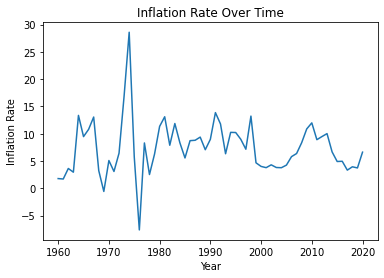

In [254]:
# @title Inflation Rate Over Time

import matplotlib.pyplot as plt
plt.plot(data_inflation['Year'], data_inflation['inflation'])
plt.title('Inflation Rate Over Time')
plt.xlabel('Year')
_ = plt.ylabel('Inflation Rate')

In [255]:
# prompt: now do the adfuller test and show whether it is stationary or not

from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(data_inflation['inflation'])
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

if adf_result[1] > 0.05:
  print("The inflation rate is not stationary.")
else:
  print("The inflation rate is stationary.")


ADF Statistic: -4.853443951169606
p-value: 4.293062853742427e-05
The inflation rate is stationary.


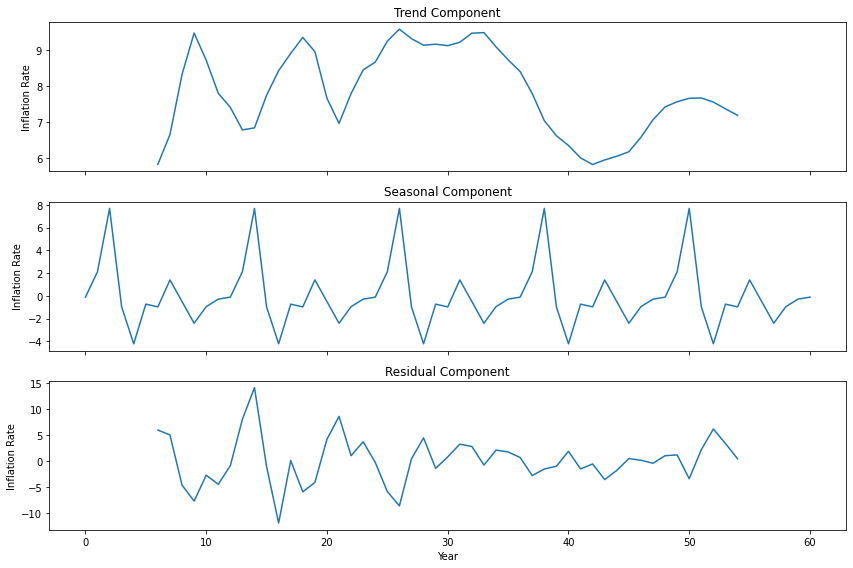

In [256]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(data_inflation['inflation'], period=12, model='additive')

# Plot the decomposed components
fig, axs = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# Plot the trend component
result.trend.plot(ax=axs[0], label='Trend')
axs[0].set_ylabel('Inflation Rate')
axs[0].set_title('Trend Component')

# Plot the seasonal component
result.seasonal.plot(ax=axs[1], label='Seasonality')
axs[1].set_ylabel('Inflation Rate')
axs[1].set_title('Seasonal Component')

# Plot the residual component
result.resid.plot(ax=axs[2], label='Residuals')
axs[2].set_xlabel('Year')
axs[2].set_ylabel('Inflation Rate')
axs[2].set_title('Residual Component')

plt.tight_layout()
plt.show()


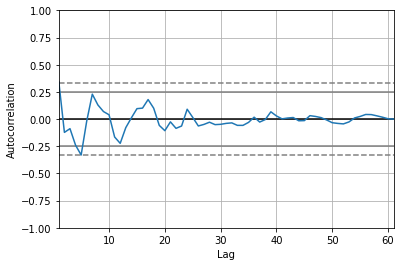

In [257]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data_inflation['inflation'])
plt.show()

<Figure size 864x576 with 0 Axes>

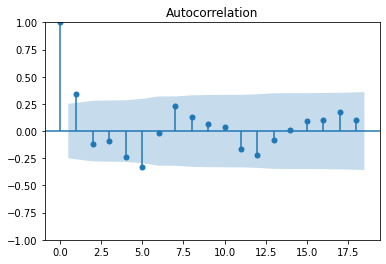

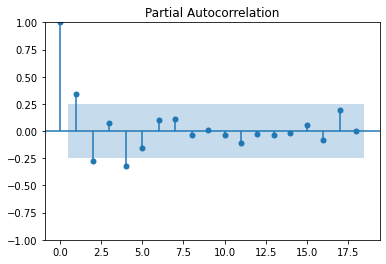

In [258]:
# prompt: import plot_acf  and plot_pacf for acf and pacf

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plt.figure(figsize=(12,8))

# Plot the ACF of the inflation rate
plot_acf(data_inflation['inflation'])
plt.show()

# Plot the PACF of the inflation rate
plot_pacf(data_inflation['inflation'])
plt.show()


In [259]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data_inflation['inflation'], order=(1,0,1))

In [260]:
result= model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              inflation   No. Observations:                   61
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -176.784
Date:                Sat, 04 May 2024   AIC                            361.567
Time:                        14:19:59   BIC                            370.011
Sample:                             0   HQIC                           364.876
                                 - 61                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4082      0.919      8.060      0.000       5.607       9.210
ar.L1         -0.1399      0.189     -0.739      0.460      -0.511       0.231
ma.L1          0.6306      0.175      3.613      0.000       0.289       0.973
sigma2        19.1576      2.607      7.349      0.000      14.048      24.267
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                22.68
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.12   Skew:                             0.78
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [261]:

# Make predictions
data_inflation['predictions'] = result.predict( start=30,end=60,dynamics=False)

data_inflation

,Year,inflation,predictions
0,1960,1.78,NaN
1,1961,1.70,NaN
2,1962,3.63,NaN
3,1963,2.95,NaN
4,1964,13.36,NaN
...,...,...,...
56,2016,4.95,6.635637
57,2017,3.33,6.689094
58,2018,3.94,5.860450
59,2019,3.73,6.682327


<Axes: >

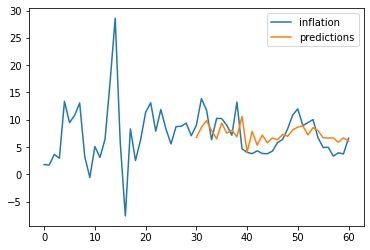

In [262]:
data_inflation[['inflation','predictions']].plot()

In [263]:

import statsmodels.api as sm


C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


    Year  inflation  predictions  sarimax_predictions
0   1960       1.78          NaN                  NaN
1   1961       1.70          NaN                  NaN
2   1962       3.63          NaN                  NaN
3   1963       2.95          NaN                  NaN
4   1964      13.36          NaN                  NaN
..   ...        ...          ...                  ...
56  2016       4.95     6.635637             3.861878
57  2017       3.33     6.689094             4.387021
58  2018       3.94     5.860450             4.351068
59  2019       3.73     6.682327             4.750550
60  2020       6.62     6.060997             4.137554

[61 rows x 4 columns]


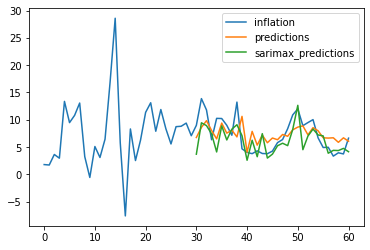

In [264]:
# prompt: now use sarimax

model = sm.tsa.statespace.SARIMAX(data_inflation['inflation'], order=(1, 0, 1), seasonal_order=(1, 0, 1, 12))
result_sarimax = model.fit()
result_sarimax.summary()

data_inflation['sarimax_predictions'] = result_sarimax.predict(start=30,end=60)
print(data_inflation)
data_inflation[['inflation', 'predictions', 'sarimax_predictions']].plot()
plt.show()


In [265]:
# prompt: check the models with accuracy check
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Calculate the mean absolute error (MAE) for both models
mae_arima = mean_absolute_error(data_inflation['inflation'].iloc[-31:], data_inflation['predictions'].dropna())
mae_sarimax = mean_absolute_error(data_inflation['inflation'].iloc[-31:], data_inflation['sarimax_predictions'].dropna())

# Calculate the mean absolute percentage error (MAPE) for both models
mape_arima = mean_absolute_error(data_inflation['inflation'].iloc[-31:], data_inflation['predictions'].dropna())
mape_sarimax = mean_absolute_error(data_inflation['inflation'].iloc[-31:], data_inflation['sarimax_predictions'].dropna())


rmse = mean_squared_error(data_inflation['inflation'].iloc[-31:], data_inflation['predictions'].dropna())
sarimax_rmse = mean_squared_error(data_inflation['inflation'].iloc[-31:], data_inflation['sarimax_predictions'].dropna())


# Print the accuracy metrics for both models
print("ARIMA Model:")
print(f"  - RMSE: {rmse}")
print(f"  - MAE: {mae_arima}")
print(f"  - MAPE: {mape_arima}")

print("SARIMAX Model:")
print(f"  - RMSE: {sarimax_rmse}")
print(f"  - MAE: {mae_sarimax}")
print(f"  - MAPE: {mape_sarimax}")


ARIMA Model:
  - RMSE: 7.515786121078491
  - MAE: 2.246796794429391
  - MAPE: 2.246796794429391
SARIMAX Model:
  - RMSE: 6.854299786986503
  - MAE: 2.1446725526647663
  - MAPE: 2.1446725526647663


In [266]:
data_inflation['inflation'].mean()

7.41327868852459

In [267]:
data_inflation.tail()

,Year,inflation,predictions,sarimax_predictions
56,2016,4.95,6.635637,3.861878
57,2017,3.33,6.689094,4.387021
58,2018,3.94,5.860450,4.351068
59,2019,3.73,6.682327,4.750550
60,2020,6.62,6.060997,4.137554


In [268]:
# prompt: change the year column to date time

import pandas as pd
data_inflation['Year'] = pd.to_datetime(data_inflation['Year'], format='%Y')


In [269]:
data_inflation.tail(10)

,Year,inflation,predictions,sarimax_predictions
51,2011-01-01,8.91,8.875637,4.510633
52,2012-01-01,9.48,7.219701,7.010053
53,2013-01-01,10.02,8.543648,8.285373
54,2014-01-01,6.67,7.973733,7.207264
55,2015-01-01,4.91,6.689282,7.038992
56,2016-01-01,4.95,6.635637,3.861878
57,2017-01-01,3.33,6.689094,4.387021
58,2018-01-01,3.94,5.860450,4.351068
59,2019-01-01,3.73,6.682327,4.750550
60,2020-01-01,6.62,6.060997,4.137554


In [270]:
future_dates = pd.date_range(start='2020-01-01', periods=20, freq='Y')
future_inflation = result_sarimax.predict(start=len(data_inflation), end=len(data_inflation) + 19)


In [271]:

# Make predictions for the next 20 periods

# Create a new DataFrame with the predicted values
future_inflation_df = pd.DataFrame({'Year': future_dates, 'Inflation': future_inflation})

# Print the predicted values
print(future_inflation_df)


         Year  Inflation
61 2020-12-31   7.943361
62 2021-12-31  10.541147
63 2022-12-31   4.893617
64 2023-12-31   4.390388
65 2024-12-31   5.855062
66 2025-12-31   5.022716
67 2026-12-31   6.314329
68 2027-12-31   5.280781
69 2028-12-31   3.953922
70 2029-12-31   4.878318
71 2030-12-31   5.057955
72 2031-12-31   5.312525
73 2032-12-31   6.578842
74 2033-12-31  10.047939
75 2034-12-31   4.716861
76 2035-12-31   4.324986
77 2036-12-31   5.827822
78 2037-12-31   5.010315
79 2038-12-31   6.305758
80 2039-12-31   5.274944


In [272]:
index_future_years = pd.date_range(start='2020-01-01'	, end='2040-01-01', freq='Y')

pred=result.predict(start=len(data_inflation),end=len(data_inflation)+19,type='levels').rename('ARIMA PREDICTIONS')

pred.index = index_future_years
future_inflation_df = pd.DataFrame({'Year': future_dates, 'Inflation': future_inflation})


print(pred)

2020-12-31    7.870936
2021-12-31    7.343406
2022-12-31    7.417212
2023-12-31    7.406886
2024-12-31    7.408331
2025-12-31    7.408129
2026-12-31    7.408157
2027-12-31    7.408153
2028-12-31    7.408154
2029-12-31    7.408153
2030-12-31    7.408153
2031-12-31    7.408153
2032-12-31    7.408153
2033-12-31    7.408153
2034-12-31    7.408153
2035-12-31    7.408153
2036-12-31    7.408153
2037-12-31    7.408153
2038-12-31    7.408153
2039-12-31    7.408153
Freq: A-DEC, Name: ARIMA PREDICTIONS, dtype: float64


C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['type']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


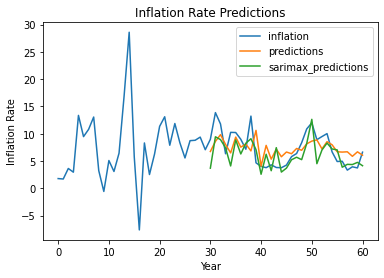

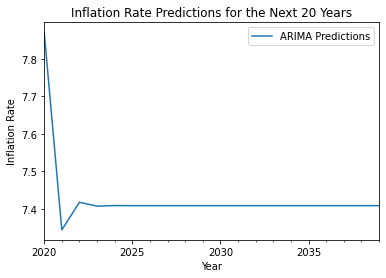

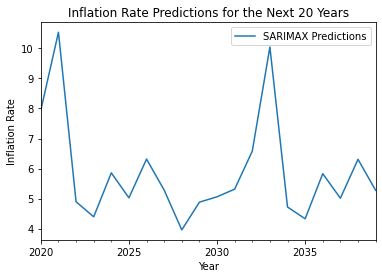

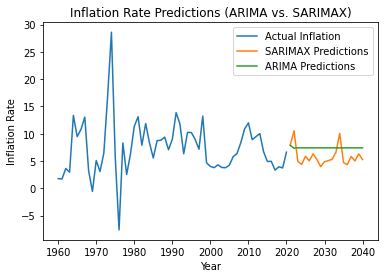

In [273]:
# prompt: now plot both these arima and sarimax predictions

import matplotlib.pyplot as plt
data_inflation[['inflation', 'predictions', 'sarimax_predictions']].plot()
plt.title('Inflation Rate Predictions')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')
plt.legend()
plt.show()


pred.plot(x='Year', y='Inflation', label='ARIMA Predictions')
plt.title('Inflation Rate Predictions for the Next 20 Years')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')
plt.legend()
plt.show()


# Plot the predicted values for the next 20 periods
future_inflation_df.plot(x='Year', y='Inflation', label='SARIMAX Predictions')
plt.title('Inflation Rate Predictions for the Next 20 Years')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')
plt.legend()
plt.show()

# Plot both ARIMA and SARIMAX predictions together
plt.plot(data_inflation['Year'], data_inflation['inflation'], label='Actual Inflation')
plt.plot(future_dates, future_inflation, label='SARIMAX Predictions')
plt.plot(pred.index, pred, label='ARIMA Predictions')
plt.title('Inflation Rate Predictions (ARIMA vs. SARIMAX)')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')
plt.legend()
plt.show()


In [274]:
data.columns

Index(['Year', 'GDP (current US$) ', ' GDP per capita (current US$) ',
       'GDP growth (annual %)', 'Imports of goods and services (% of GDP)',
       'Exports of goods and services (% of GDP)',
       ' Total reserves (includes gold, current US$) ',
       'Inflation, consumer prices (annual %)', 'Population, total',
       'Population growth (annual %)',
       'Life expectancy at birth, total (years)'],
      dtype='object')

In [275]:
# prompt: now remove all columns and take only two colums, year and inflation

data_growth = data[['Year', 'GDP growth (annual %)']]
data_growth


,Year,GDP growth (annual %)
0,1960,0.00
1,1961,3.72
2,1962,2.93
3,1963,5.99
4,1964,7.45
...,...,...
56,2016,8.26
57,2017,6.80
58,2018,6.53
59,2019,4.04


In [276]:
data_growth = data_growth.rename(columns={'GDP growth (annual %)':'GDP growth'})
data_growth

,Year,GDP growth
0,1960,0.00
1,1961,3.72
2,1962,2.93
3,1963,5.99
4,1964,7.45
...,...,...
56,2016,8.26
57,2017,6.80
58,2018,6.53
59,2019,4.04


<Axes: xlabel='Year'>

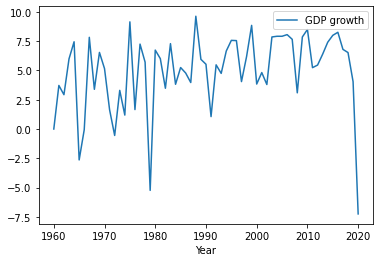

In [277]:
data_growth.plot(x="Year",y="GDP growth")

In [278]:
# prompt: now do the adfuller test and show whether it is stationary or not

from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(data_growth['GDP growth'])
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

if adf_result[1] > 0.05:
  print("The GDP per capita rate is not stationary.")
else:
  print("The GDP per capita rate is stationary.")


ADF Statistic: -6.203435900996275
p-value: 5.733303892352508e-08
The GDP per capita rate is stationary.


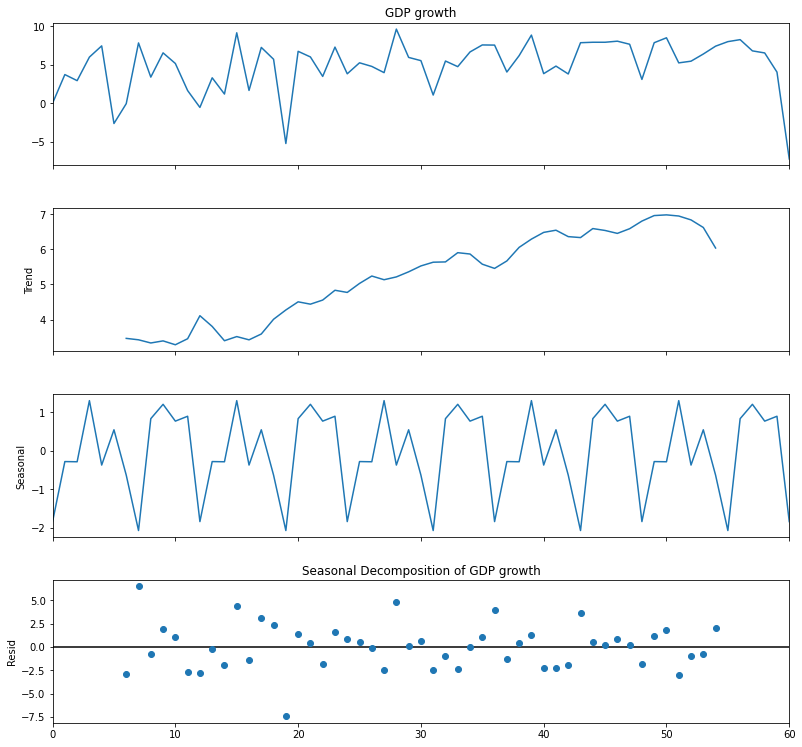

In [279]:
result = seasonal_decompose(data_growth['GDP growth'], model='additive', period=12)

# Create the seasonal decomposition plot
fig = result.plot()  # Default size

# Optional: Adjust figure size
fig.set_size_inches(12, 12)  # Set your desired figure size

# Optional: Add title
plt.title("Seasonal Decomposition of GDP growth")

plt.show()

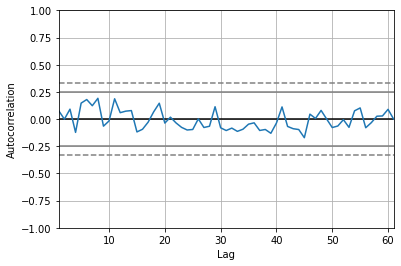

In [280]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data_growth['GDP growth'])
plt.show()

<Figure size 864x576 with 0 Axes>

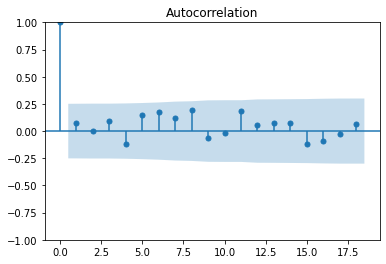

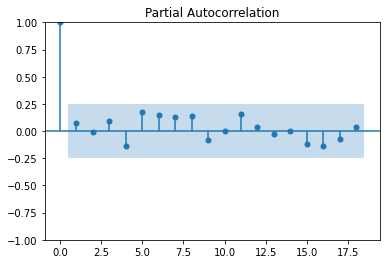

In [281]:
# prompt: import plot_acf  and plot_pacf for acf and pacf

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plt.figure(figsize=(12,8))

# Plot the ACF of the inflation rate
plot_acf(data_growth['GDP growth'])
plt.show()

# Plot the PACF of the inflation rate
plot_pacf(data_growth['GDP growth'])
plt.show()


In [282]:
!pip install pmdarima

from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose  # Optional for seasonal check
import matplotlib.pyplot as plt  # Optional for plotting



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [283]:
model = auto_arima(data_growth['GDP growth'], trace=True, error_action='ignore')  # Adjust as needed

# Print the summary of the fitted model
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=347.002, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=337.844, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=345.051, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=332.082, Time=0.11 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=334.063, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=330.125, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=335.902, Time=0.04 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=332.105, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=323.491, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=322.276, Time=0.08 sec
 A

In [330]:
model2 = ARIMA(data_growth['GDP growth'], order=(0, 1, 1))

# Fit the model
model2_fit = model2.fit()

# Print the summary of the fitted model
print(model2_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             GDP growth   No. Observations:                   61
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -158.140
Date:                Sat, 04 May 2024   AIC                            320.280
Time:                        15:12:56   BIC                            324.468
Sample:                             0   HQIC                           321.918
                                 - 61                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9042      0.108     -8.409      0.000      -1.115      -0.693
sigma2        11.0794      1.471      7.531      0.000       8.196      13.963
Ljung-Box (L1) (Q):                   0.05   Jarque-

In [346]:

# Make predictions
data_growth['arima growth predictions'] = model2_fit .predict( start=30,end=60,dynamics=True)

data_growth

,Year,GDP growth,arima growth predictions,sarimax_growth_predictions
0,1960-01-01,0.00,NaN,NaN
1,1961-01-01,3.72,NaN,NaN
2,1962-01-01,2.93,NaN,NaN
3,1963-01-01,5.99,NaN,NaN
4,1964-01-01,7.45,NaN,NaN
...,...,...,...,...
56,2016-01-01,8.26,6.489604,8.424116
57,2017-01-01,6.80,6.659260,8.834020
58,2018-01-01,6.53,6.672747,8.215690
59,2019-01-01,4.04,6.659068,8.290546


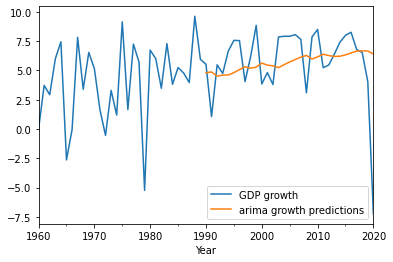

In [347]:
data_growth.plot(x='Year', y=['GDP growth', 'arima growth predictions'])
plt.show()

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


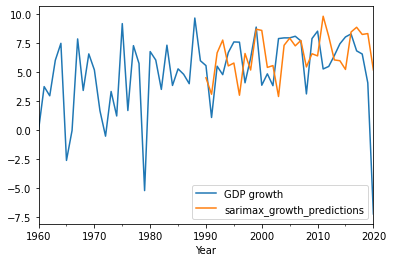

In [348]:
# prompt: now use sarimax

model3 = sm.tsa.statespace.SARIMAX(data_growth['GDP growth'], order=(0, 1, 1), seasonal_order=(0, 1, 1, 12))
result_sarimax = model3.fit()
result_sarimax.summary()

data_growth['sarimax_growth_predictions'] = result_sarimax.predict(start=30,end=60)

data_growth.plot(x='Year', y=['GDP growth', 'sarimax_growth_predictions'])
plt.show()


In [349]:
data_growth

,Year,GDP growth,arima growth predictions,sarimax_growth_predictions
0,1960-01-01,0.00,NaN,NaN
1,1961-01-01,3.72,NaN,NaN
2,1962-01-01,2.93,NaN,NaN
3,1963-01-01,5.99,NaN,NaN
4,1964-01-01,7.45,NaN,NaN
...,...,...,...,...
56,2016-01-01,8.26,6.489604,8.424116
57,2017-01-01,6.80,6.659260,8.834020
58,2018-01-01,6.53,6.672747,8.215690
59,2019-01-01,4.04,6.659068,8.290546


In [350]:
# prompt: check the models with accuracy check
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Calculate the mean absolute error (MAE) for both models
mae_arima = mean_absolute_error(data_growth['GDP growth'].iloc[-31:], data_growth['arima growth predictions'].dropna())
mae_sarimax = mean_absolute_error(data_growth['GDP growth'].iloc[-31:], data_growth['sarimax_growth_predictions'].dropna())

# Calculate the mean absolute percentage error (MAPE) for both models
mape_arima = mean_absolute_error(data_growth['GDP growth'].iloc[-31:], data_growth['arima growth predictions'].dropna())
mape_sarimax = mean_absolute_error(data_growth['GDP growth'].iloc[-31:], data_growth['sarimax_growth_predictions'].dropna())


rmse = mean_squared_error(data_growth['GDP growth'].iloc[-31:], data_growth['arima growth predictions'].dropna())
sarimax_rmse = mean_squared_error(data_growth['GDP growth'].iloc[-31:], data_growth['sarimax_growth_predictions'].dropna())


# Print the accuracy metrics for both models
print("ARIMA Model:")
print(f"  - RMSE: {rmse}")
print(f"  - MAE: {mae_arima}")
print(f"  - MAPE: {mape_arima}")

print("SARIMAX Model:")
print(f"  - RMSE: {sarimax_rmse}")
print(f"  - MAE: {mae_sarimax}")
print(f"  - MAPE: {mape_sarimax}")


ARIMA Model:
  - RMSE: 9.734222683828998
  - MAE: 2.077967505069251
  - MAPE: 2.077967505069251
SARIMAX Model:
  - RMSE: 10.583318221885921
  - MAE: 2.259842024797362
  - MAPE: 2.259842024797362


In [351]:
data_growth['Year'] = pd.to_datetime(data_growth['Year'], format='%Y')
future_dates = pd.date_range(start='2020-01-01', periods=20, freq='Y')
future_growth = result_sarimax.predict(start=len(data_growth), end=len(data_growth) + 19)

future_growth_df = pd.DataFrame({'Year': future_dates, 'GDP growth': future_growth})

# Print the predicted values
print(future_growth_df)


         Year  GDP growth
61 2020-12-31    6.115908
62 2021-12-31    5.995929
63 2022-12-31    7.919895
64 2023-12-31    6.887901
65 2024-12-31    5.633922
66 2025-12-31    5.757917
67 2026-12-31    5.181933
68 2027-12-31    7.637912
69 2028-12-31    7.683906
70 2029-12-31    7.257912
71 2030-12-31    6.919890
72 2031-12-31    2.697824
73 2032-12-31    6.637163
74 2033-12-31    6.517184
75 2034-12-31    8.441149
76 2035-12-31    7.409156
77 2036-12-31    6.155176
78 2037-12-31    6.279171
79 2038-12-31    5.703187
80 2039-12-31    8.159166


In [352]:
index_future_years = pd.date_range(start='2020-01-01'	, end='2040-01-01', freq='Y')

pred=model2_fit.predict(start=len(data_growth),end=len(data_growth)+19,type='levels').rename('ARIMA GROWTH PREDICTIONS')

pred.index = index_future_years
future_growth_df = pd.DataFrame({'Year': future_dates, 'GDP growth': future_growth})


pred

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['type']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


2020-12-31    5.099256
2021-12-31    5.099256
2022-12-31    5.099256
2023-12-31    5.099256
2024-12-31    5.099256
2025-12-31    5.099256
2026-12-31    5.099256
2027-12-31    5.099256
2028-12-31    5.099256
2029-12-31    5.099256
2030-12-31    5.099256
2031-12-31    5.099256
2032-12-31    5.099256
2033-12-31    5.099256
2034-12-31    5.099256
2035-12-31    5.099256
2036-12-31    5.099256
2037-12-31    5.099256
2038-12-31    5.099256
2039-12-31    5.099256
Freq: A-DEC, Name: ARIMA GROWTH PREDICTIONS, dtype: float64

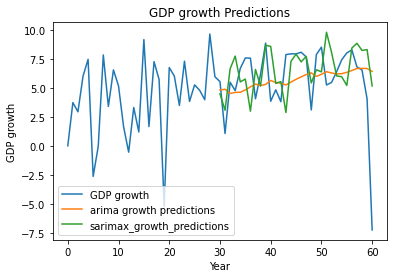

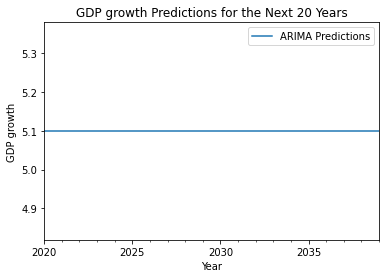

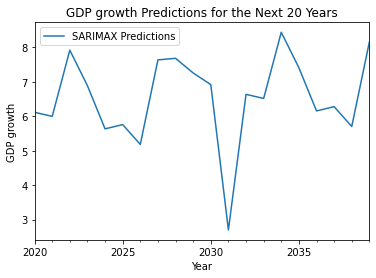

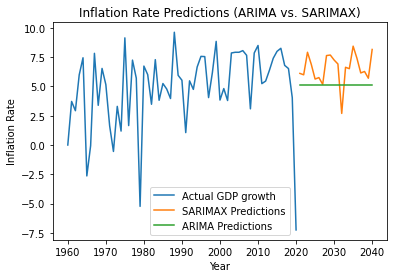

In [353]:
data_growth[['GDP growth', 'arima growth predictions', 'sarimax_growth_predictions']].plot()
plt.title('GDP growth Predictions')
plt.xlabel('Year')
plt.ylabel('GDP growth')
plt.legend()
plt.show()


pred.plot(x='Year', y='GDP growth', label='ARIMA Predictions')
plt.title('GDP growth Predictions for the Next 20 Years')
plt.xlabel('Year')
plt.ylabel('GDP growth')
plt.legend()
plt.show()


# Plot the predicted values for the next 20 periods
future_growth_df.plot(x='Year', y='GDP growth', label='SARIMAX Predictions')
plt.title('GDP growth Predictions for the Next 20 Years')
plt.xlabel('Year')
plt.ylabel('GDP growth')
plt.legend()
plt.show()

# Plot both ARIMA and SARIMAX predictions together
plt.plot(data_growth['Year'], data_growth['GDP growth'], label='Actual GDP growth')
plt.plot(future_dates, future_growth, label='SARIMAX Predictions')
plt.plot(pred.index, pred, label='ARIMA Predictions')
plt.title('Inflation Rate Predictions (ARIMA vs. SARIMAX)')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')
plt.legend()
plt.show()
